In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# 주피터 내장
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc

In [2]:
# smoker=pd.read_csv('../data/smokers.csv', encoding = 'utf-8')
smoker=pd.read_excel('../data/practice_smokers.xls', encoding='utf-8', header=1)
# pop=pd.read_csv('../data/practice_pop.csv', encoding='utf-8')
pop=pd.read_excel('../data/practice_pop1.xlsx', encoding='utf-8' )

In [3]:
smoker.info()
smoker.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
성별(1)        3 non-null object
응답자특성별(1)    18 non-null object
응답자특성별(2)    72 non-null object
응답자수 (명)     72 non-null int64
분율 (%)       72 non-null float64
표준오차         72 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.5+ KB


(72, 6)

In [4]:
smoker1 = pd.DataFrame(smoker)
smoker1.head(12)

,성별(1),응답자특성별(1),응답자특성별(2),응답자수 (명),분율 (%),표준오차
0,전체,전체,19세이상,6115,21.1,0.8
1,NaN,NaN,19세이상(표준화),6115,22.3,0.9
2,NaN,연령대별1,19-29세,724,24.4,2.0
3,NaN,NaN,30-39세,904,25.5,1.9
4,NaN,NaN,40-49세,1122,26.3,1.5
5,NaN,NaN,50-59세,1204,20.2,1.5
6,NaN,NaN,60-69세,1089,14.4,1.2
7,NaN,NaN,70세이상,1072,8.5,0.9
8,NaN,NaN,19-64세,4528,23.3,1.0
9,NaN,NaN,65세이상,1587,9.6,0.9


In [5]:
# 분율 모두, 남, 여 분리하기
ratio1 = smoker.loc[0:23, '분율 (%)'].astype(float)
ratio2 = smoker.loc[24:47, '분율 (%)'].astype(float)
ratio3 = smoker.loc[48:72, '분율 (%)'].astype(float)


0     21.1
1     22.3
2     24.4
3     25.5
4     26.3
5     20.2
6     14.4
7      8.5
8     23.3
9      9.6
10    20.6
11    23.7
12    24.9
13    23.9
14    21.5
15    20.0
16    15.1
17    21.5
18    27.5
19    26.0
20    24.9
21    22.7
22    21.7
23    15.9
Name: 분율 (%), dtype: float64

In [6]:

# 남녀 인구수 가져오기
total  = pop.iloc[0, 1].astype(float)
male   = pop.iloc[1, 1].astype(float)
female = pop.loc[2, 2017].astype(float)
# print(total)
# print(male)
# print(female)
# print(total==male+female)

51361911.0
25736793.0
25625118.0
True


In [7]:
# smoker['num_smoker'] = smoker.concat([ratio1*total, ratio2*male, ratio3*female])
variable = pd.concat([ratio1*total, ratio2*male, ratio3*female])
smoker['num_smoker'] = variable
# print(smoker['num_smoker'])

0     1.083736e+09
1     1.145371e+09
2     1.253231e+09
3     1.309729e+09
4     1.350818e+09
          ...     
67    2.383136e+08
68    1.358131e+08
69    1.793758e+08
70    1.178755e+08
71    8.712540e+07
Name: num_smoker, Length: 72, dtype: float64


In [8]:
# smoker['num_smoker_total']=[]
# smoker['num_smoker_male']=[]
# smoker['num_smoker_female']=[]

# tmp = [smoker['num_smoker_total'], smoker['num_smoker_male'], smoker['num_smoker_female']]

# for i in range(4):
#     for j in tmp:
#         j = smoker.loc[i:i*(len(smoker)-1)/3]
# print(j)


# smoker['num_smoker'] = pd.concat[smoker['num_smoker_total'],smoker['num_smoker_male'],smoker['num_smoker_female']]


In [19]:
import numpy as np

smoker['응답자수 (명)']= smoker['응답자수 (명)'].astype(str).astype(float)
# print(smoker['응답자수 (명)'])

np.corrcoef(smoker['응답자수 (명)'], smoker['num_smoker'])

array([[1.       , 0.1654224],
       [0.1654224, 1.       ]])

In [21]:
import numpy as np

smoker['분율 (%)']= smoker['분율 (%)'].astype(str).astype(float)
# print(smoker['분율 (%)'])

np.corrcoef(smoker['분율 (%)'], smoker['num_smoker'])

array([[1.        , 0.81791056],
       [0.81791056, 1.        ]])

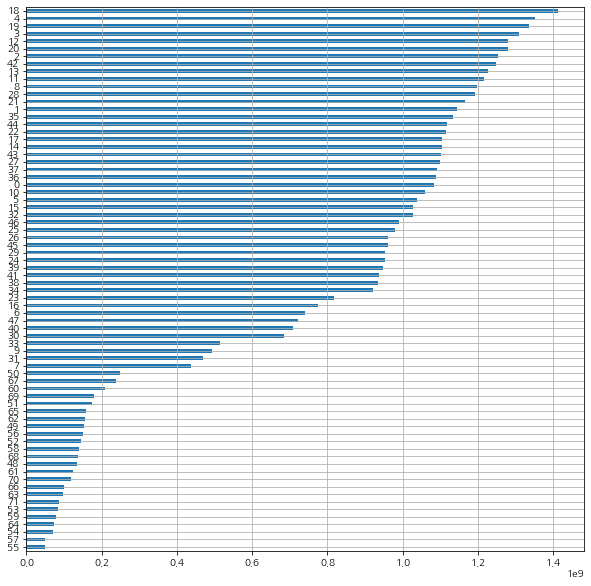

In [23]:
plt.figure()
plt.rc('font', family='NanumGothic')
smoker['num_smoker'].sort_values().plot( kind='barh', grid=True, figsize=(10,10) )
plt.show()